In [50]:
import geopandas as gpd
import pandas as pd
%pylab inline
from shapely.wkt import loads
import os
import mplleaflet as mpll
import rasterio
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/nicholasjones/anaconda3/envs/GPD/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['loads']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


__FB disaster maps.__ Disaster Maps uses location data of FB users to provide insights on how a natural disaster affected local populations and infrastructure. It looks at population displacement, loss of electricity, loss of cellphone coverage, and where people went.

Questions:
* How much population displacement was there in the region?
* Which areas worst affected?
* Was there significant loss of cellphone or power coverage?
* What patterns are discernable in where people went? From cities to rural areas? Population displacement evenly distributed?

### 1. Load population by admin region data

In [43]:
contents = os.listdir()
for i in contents:
    print(i)

the_flooding_across_southwest_maharashtra_india_movement_between_tiles
the_flooding_across_southwest_maharashtra_india_facebook_traffic
.DS_Store
the_flooding_across_southwest_maharashtra_india_facebook_population_tile_level
the_flooding_across_southwest_maharashtra_india_movement_between_administrative_regions.csv
admin_regions
Untitled.ipynb
the_flooding_across_southwest_maharashtra_india_network_coverage_conservative
the_flooding_across_southwest_maharashtra_india_difference_in_network_coverage_normal
the_flooding_across_southwest_maharashtra_india_network_coverage_normal
the_flooding_across_southwest_maharashtra_india_difference_in_network_coverage_conservative
.ipynb_checkpoints


In [18]:
s

['20190806_0000.csv', '20190806_0800.csv', '20190806_1600.csv']

In [19]:
df1 = pd.read_csv('admin_regions/'+admin_region_files[8])
df1.rename(columns = {'Standard (Z) Score':'z_score', 'Baseline: People':'baseline_people',
                      'Crisis: People':'crisis_people', 'Region Name':'region_name',
                     'Percent Change':'percent_change'},inplace = True)
df1['Geometry'] = df1['Geometry'].apply(loads)
gdf = gpd.GeoDataFrame(df1, geometry = 'Geometry')
 

In [29]:
df_pop = pd.read_csv('Kohlapur_pop.csv')

In [30]:
df_pop = df_pop[df_pop.TRU == "Total"].drop(columns=['TRU','No_HH'])
df_pop.head(2)

Name   TOT_P
0  Shahuwadi  180322
3    Panhala  256296

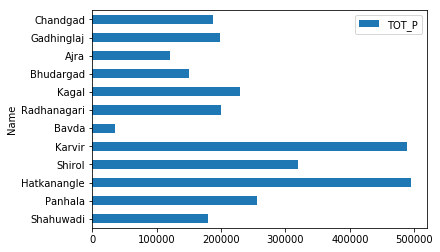

In [17]:
df_pop.plot(kind = 'barh')

In [25]:
df1.region_name.isin(df_pop.index).sum()

11

In [34]:
df_pop = df_pop.merge(df1, left_on = 'Name', right_on = 'region_name')

In [38]:
df_pop['percent_FB_users'] = df_pop.baseline_people / df_pop.TOT_P * 100

In [76]:
df_pop.head(3)

Name   TOT_P   z_score  baseline_people  crisis_people  Difference  \
0    Shahuwadi  180322 -2.347635      1253.583333            623 -630.583333   
1      Panhala  256296 -4.000000      2568.750000           2014 -554.750000   
2  Hatkanangle  494747 -2.610185     18055.381814          17236 -819.381814   

   percent_change  region_name  Spaco Id  \
0      -50.262371    Shahuwadi   1103092   
1      -21.587703      Panhala   1103093   
2       -4.537907  Hatkanangle   1103094   

                                            Geometry  percent_FB_users  
0  POLYGON ((74.103425 16.90897, 74.0986 16.91020...          0.695192  
1  POLYGON ((74.22833 16.834899, 74.2269 16.83939...          1.002259  
2  POLYGON ((74.502664 16.674904, 74.500733999999...          3.649417

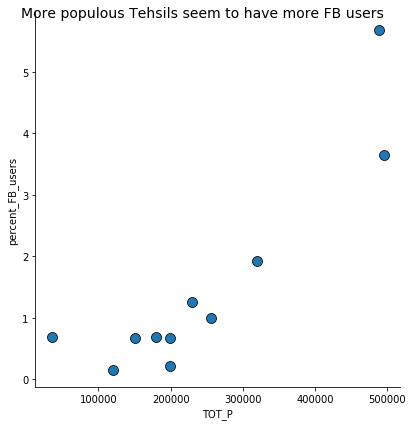

In [75]:
#f,ax = plt.subplots(figsize = [6,6])
sns.pairplot(y_vars='percent_FB_users',x_vars='TOT_P', data = df_pop, size = 6,
            plot_kws = {'s': 100, 'edgecolor': 'k'});
plt.suptitle('More populous Tehsils seem to have more FB users', size = 14);

### Read the population by admin_block into a data-cube

In [79]:
df1.head()

z_score  baseline_people  crisis_people  Difference  percent_change  \
0 -3.240987       233.531323            192  -41.531323      -17.708220   
1 -1.037518       162.416667             86  -76.416667      -46.761856   
2 -0.829405      1246.083333           1140 -106.083333       -8.506515   
3  0.000000         0.000000              0    0.000000        0.000000   
4 -1.351682        64.326861             30  -34.326861      -52.546319   

    region_name  Spaco Id                                           Geometry  
0       Sangole   1103060  (POLYGON ((75.335728 17.259585, 75.33304799999...  
1         Patan   1103073  POLYGON ((74.067683 17.318493, 74.067238 17.32...  
2         Karad   1103074  POLYGON ((74.293708 17.315555, 74.293221 17.31...  
3  Sangameshwar   1103081  POLYGON ((73.83389699999999 16.998509, 73.8332...  
4   Vaibhavvadi   1103085  POLYGON ((73.88607499999999 16.454027, 73.8854...

In [88]:
df_base = pd.read_csv('admin_regions/'+admin_region_files[0],usecols=['Standard (Z) Score', 'Baseline: People','Crisis: People', 'Region Name'])

In [90]:
arr = df_base.values

In [92]:
np.hstack?

In [91]:
pd.read_csv('admin_regions/'+admin_region_files[1],usecols=['Standard (Z) Score', 'Baseline: People','Crisis: People', 'Region Name']).values

array([[-0.9230994941263599, 236.0, 225, 'Sangole'],
       [-0.87171792485532, 167.08333333333, 102, 'Patan'],
       [0.11178646281508, 1278.0, 1293, 'Karad'],
       [-0.5527707983925699, 0.25, 0, 'Sangameshwar'],
       [-1.6253521807517999, 73.583333333333, 24, 'Vaibhavvadi'],
       [-1.0379902897537, 246.08333333332996, 173, 'Kankavli'],
       [-1.7168428078505, 1465.3333333332998, 949, 'Shahuwadi'],
       [-2.2588569425158, 2607.9166666667, 2346, 'Panhala'],
       [-1.1329542285688998, 19750.916666667, 19301, 'Hatkanangle'],
       [-3.6137673924762006, 6370.3928942637, 5933, 'Shirol'],
       [-4.0, 31760.132386093, 26687, 'Karvir'],
       [-4.0, 258.41666666667004, 151, 'Bavda'],
       [-3.5749271444077997, 1417.6666666667002, 1008, 'Radhanagari'],
       [-4.0, 3001.4166666666997, 2640, 'Kagal'],
       [-1.6244342987248999, 1136.6578817269, 964, 'Bhudargad'],
       [-1.6660883420286998, 215.16306564143002, 155, 'Ajra'],
       [-0.10527266692575998, 390.77339013857005

### 2. Basic stats: baseline population in the region etc

In [204]:
print("There are {} admin districts included".format(len(df1)))
print("Baseline number of people in all of them: {:.0f}".format(df1.baseline_people.sum()))
print("Mean number of people per admin district: {:.0f}".format(df1.baseline_people.mean()))
print()
print("Admin districts baseline population range from:")
print("     {:.0f}".format(df1.baseline_people.min()))
print("     to {:.0f}".format(df1.baseline_people.max()))
      

There are 34 admin districts included
Baseline number of people in all of them: 125027
Mean number of people per admin district: 3677

Admin districts baseline population range from:
     0
     to 27768


In [213]:
df1[df1.region_name == 'Karvir']

z_score  baseline_people  crisis_people   Difference  Percent Change  \
10     -4.0     27767.816616          23285 -4482.816616      -16.143348   

   region_name  Spaco Id                                           Geometry  
10      Karvir   1103096  POLYGON ((74.35412599999999 16.678664, 74.3540...

In [ ]:
# What's going on because Karvir tehsil has population of 3.8 million in the 2011 census

# Here it has baseline of 27,700 people.


In [217]:
print("Assuming 30% of people use Facebook, a baseline population of 27,700 people would imply the actual local population is: {:.0f} people".format(
                27700 / 30 * 100))

Assuming 30% of people use Facebook, a baseline population of 27,700 people would imply the actual local population is: 92333 people


In [ ]:
# can't figure it out - what do these population figures refer to

#### Baseline population

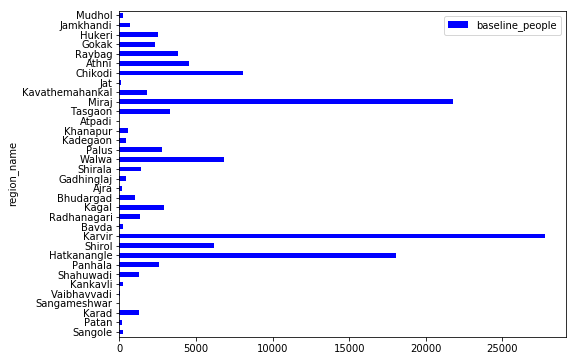

In [248]:
df1.plot(x='region_name',y='baseline_people',kind='barh',figsize=[8,6],color='b')

#### Which districts saw largest outflow of population?

In [233]:
df1.sort_values('Difference', ascending = True)[:5]

z_score  baseline_people  crisis_people   Difference  percent_change  \
10     -4.0     27767.816616          23285 -4482.816616      -16.143348   
24     -4.0     21789.750000          18108 -3681.750000      -16.895931   
9      -4.0      6165.833333           3831 -2334.833333      -37.861139   
27     -4.0      8043.166667           5879 -2164.166667      -26.903553   
13     -4.0      2886.583333           2045  -841.583333      -29.144902   

   region_name  Spaco Id                                           Geometry  
10      Karvir   1103096  POLYGON ((74.35412599999999 16.678664, 74.3540...  
24       Miraj   1103111  POLYGON ((74.96266199999999 16.902776, 74.9575...  
9       Shirol   1103095  POLYGON ((74.700592 16.73119, 74.7005719999999...  
27     Chikodi   1103786  POLYGON ((74.806718 16.322486, 74.805747 16.32...  
13       Kagal   1103099  POLYGON ((74.38887199999999 16.562144, 74.3847...

#### Which districts saw largest inflow of population?

In [235]:
df1.sort_values('Difference', ascending = False)[:5]

z_score  baseline_people  crisis_people  Difference  percent_change  \
23  0.460326      3331.750000           3387   55.250000        1.657790   
32  3.792833       710.773912            759   48.226088        6.775478   
33  2.152421       235.416667            258   22.583333        9.552344   
26  0.450601       124.952582            131    6.047418        4.801345   
3   0.000000         0.000000              0    0.000000        0.000000   

     region_name  Spaco Id                                           Geometry  
23       Tasgaon   1103110  POLYGON ((74.85865699999999 17.132424, 74.8583...  
32     Jamkhandi   1103796  POLYGON ((75.493584 16.74693, 75.479686 16.747...  
33        Mudhol   1103798  POLYGON ((75.49634499999999 16.345661, 75.4956...  
26           Jat   1103113  POLYGON ((75.67797299999999 17.081592, 75.6728...  
3   Sangameshwar   1103081  POLYGON ((73.83389699999999 16.998509, 73.8332...

#### Which districts saw largest relative outflow of population?

In [240]:
df1.sort_values('percent_change', ascending = True)[:5]

z_score  baseline_people  crisis_people  Difference  percent_change  \
11 -4.000000       244.166667             89 -155.166667      -63.290279   
12 -4.000000      1352.083333            605 -747.083333      -55.213401   
4  -1.351682        64.326861             30  -34.326861      -52.546319   
6  -2.347635      1253.583333            623 -630.583333      -50.262371   
1  -1.037518       162.416667             86  -76.416667      -46.761856   

    region_name  Spaco Id                                           Geometry  
11        Bavda   1103097  POLYGON ((74.03111799999999 16.702122, 74.0304...  
12  Radhanagari   1103098  POLYGON ((74.194412 16.480055, 74.192410999999...  
4   Vaibhavvadi   1103085  POLYGON ((73.88607499999999 16.454027, 73.8854...  
6     Shahuwadi   1103092  POLYGON ((74.103425 16.90897, 74.0986 16.91020...  
1         Patan   1103073  POLYGON ((74.067683 17.318493, 74.067238 17.32...

#### Which districts saw largest relative inflow of population?

In [242]:
df1.sort_values('percent_change', ascending = False)[:5]

z_score  baseline_people  crisis_people  Difference  percent_change  \
33  2.152421       235.416667            258   22.583333        9.552344   
32  3.792833       710.773912            759   48.226088        6.775478   
26  0.450601       124.952582            131    6.047418        4.801345   
23  0.460326      3331.750000           3387   55.250000        1.657790   
22  0.000000         0.000000              0    0.000000        0.000000   

   region_name  Spaco Id                                           Geometry  
33      Mudhol   1103798  POLYGON ((75.49634499999999 16.345661, 75.4956...  
32   Jamkhandi   1103796  POLYGON ((75.493584 16.74693, 75.479686 16.747...  
26         Jat   1103113  POLYGON ((75.67797299999999 17.081592, 75.6728...  
23     Tasgaon   1103110  POLYGON ((74.85865699999999 17.132424, 74.8583...  
22      Atpadi   1103109  POLYGON ((75.04135699999999 17.475715, 75.0403...

#### Outflow by z-score

In [247]:
df1.sort_values('z_score', ascending = False)[:5]

z_score  baseline_people  crisis_people  Difference  percent_change  \
32  3.792833       710.773912            759   48.226088        6.775478   
33  2.152421       235.416667            258   22.583333        9.552344   
23  0.460326      3331.750000           3387   55.250000        1.657790   
26  0.450601       124.952582            131    6.047418        4.801345   
3   0.000000         0.000000              0    0.000000        0.000000   

     region_name  Spaco Id                                           Geometry  
32     Jamkhandi   1103796  POLYGON ((75.493584 16.74693, 75.479686 16.747...  
33        Mudhol   1103798  POLYGON ((75.49634499999999 16.345661, 75.4956...  
23       Tasgaon   1103110  POLYGON ((74.85865699999999 17.132424, 74.8583...  
26           Jat   1103113  POLYGON ((75.67797299999999 17.081592, 75.6728...  
3   Sangameshwar   1103081  POLYGON ((73.83389699999999 16.998509, 73.8332...

#### Inflow by z-score

In [245]:
df1.sort_values('z_score', ascending = True)[:5]

z_score  baseline_people  crisis_people   Difference  percent_change  \
10     -4.0     27767.816616          23285 -4482.816616      -16.143348   
19     -4.0      2796.416667           2145  -651.416667      -23.286365   
27     -4.0      8043.166667           5879 -2164.166667      -26.903553   
13     -4.0      2886.583333           2045  -841.583333      -29.144902   
12     -4.0      1352.083333            605  -747.083333      -55.213401   

    region_name  Spaco Id                                           Geometry  
10       Karvir   1103096  POLYGON ((74.35412599999999 16.678664, 74.3540...  
19        Palus   1103106  POLYGON ((74.572701 16.991609, 74.572484 16.99...  
27      Chikodi   1103786  POLYGON ((74.806718 16.322486, 74.805747 16.32...  
13        Kagal   1103099  POLYGON ((74.38887199999999 16.562144, 74.3847...  
12  Radhanagari   1103098  POLYGON ((74.194412 16.480055, 74.192410999999...

In [ ]:
### Plot of absolute displacement versus z_score

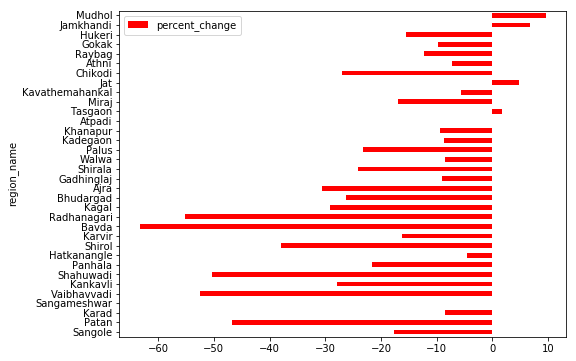

In [223]:
df1.plot(x='region_name',y='percent_change',kind='barh',figsize=[8,6],color='r')

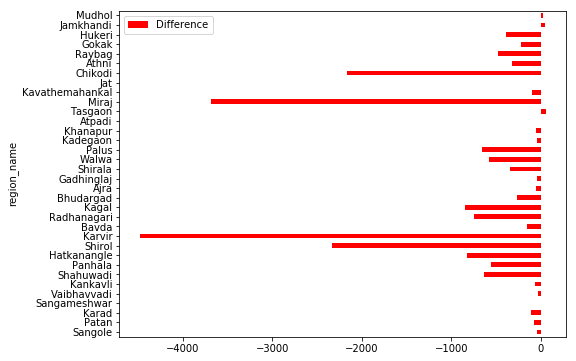

In [202]:
df1.plot(x='region_name',y='z_score',kind='barh',figsize=[8,6],color='r')

In [160]:
def show_map(csv_file):
    df1 = pd.read_csv('admin_regions/'+ csv_file)
    df1.rename(columns = {'Standard (Z) Score':'z_score', 'Baseline: People':'baseline_people',
                          'Crisis: People':'crisis_people'},inplace = True)
    df1['Geometry'] = df1['Geometry'].apply(loads)
    gdf = gpd.GeoDataFrame(df1, geometry = 'Geometry')
    df1.head()
    ax = gdf.plot(column = 'z_score',legend=False,cmap = 'RdYlGn',figsize = [8,8], vmin = -4, vmax=4)
    plt.scatter(74.223182,16.698363, color = 'k')   # Kohlapur
    plt.scatter(74.569727,16.851446, color = 'k')    # Sangli
    ax.set(title = "August {}, 2019 at {}:{}".format(csv_file[6:8], csv_file[9:11], csv_file[11:13]))
    ax.set(xlim = [73.2, 75.9], ylim = [15.7, 17.75])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.savefig('pop_animation/'+csv_file[:-4])

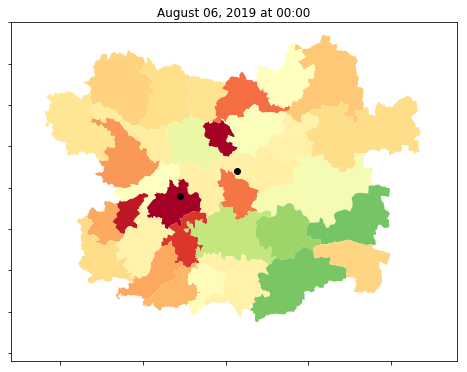

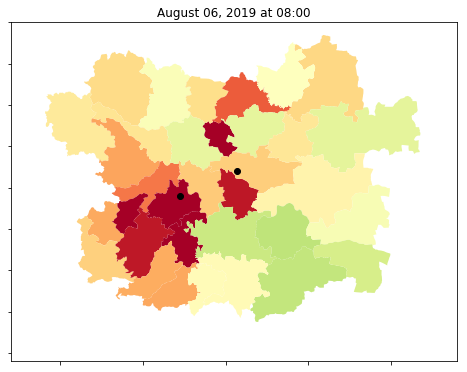

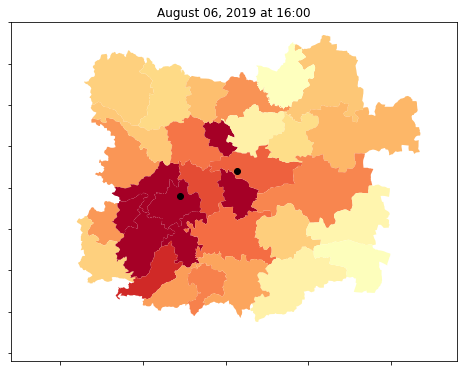

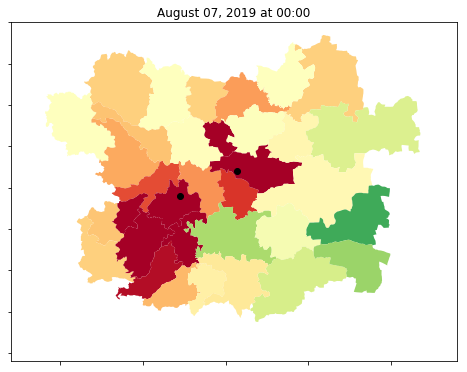

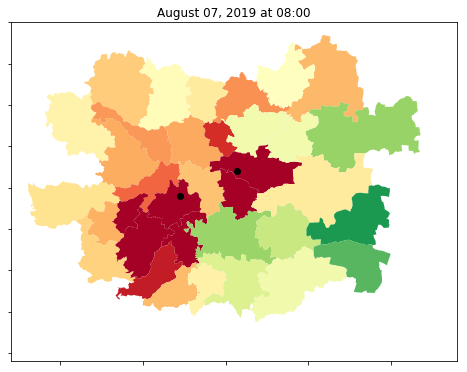

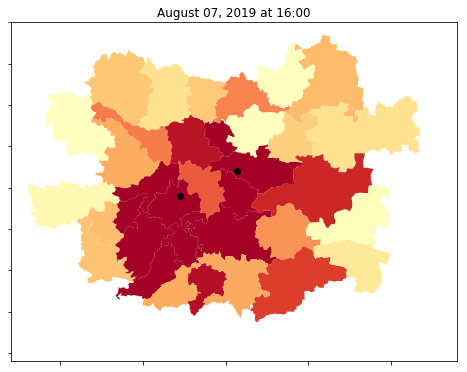

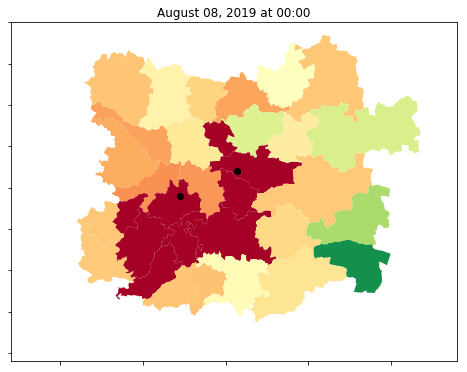

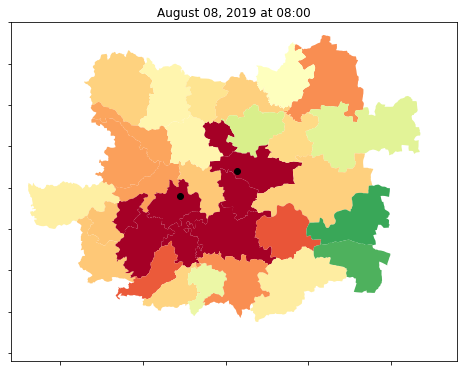

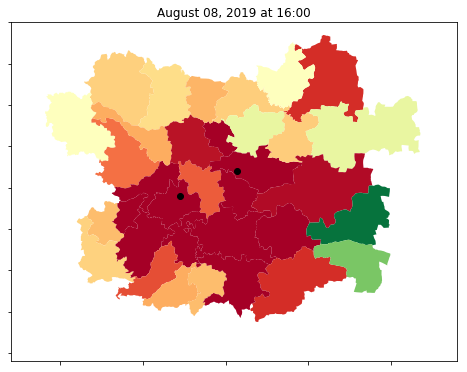

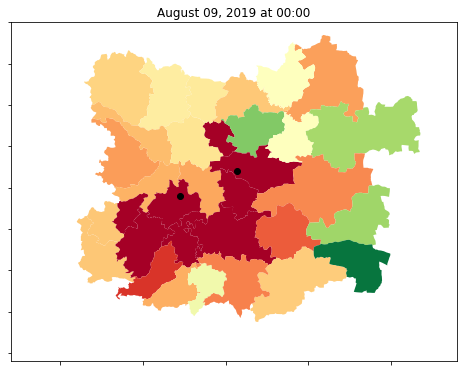

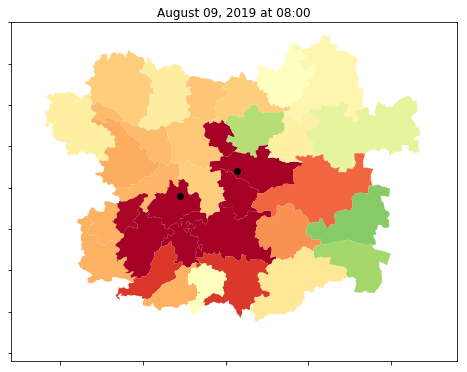

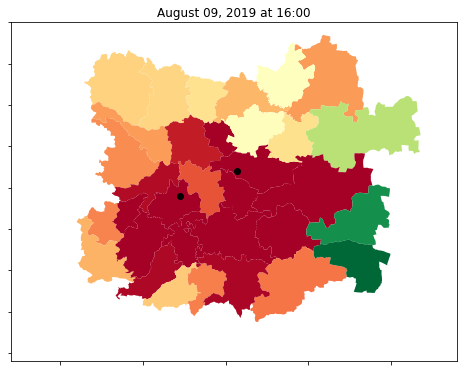

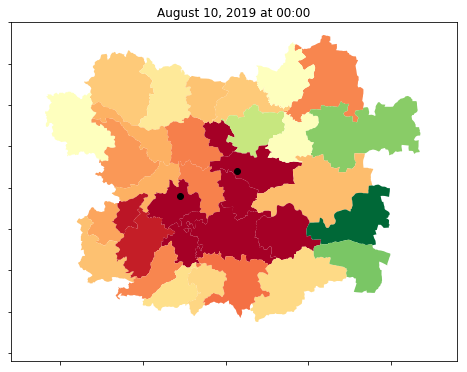

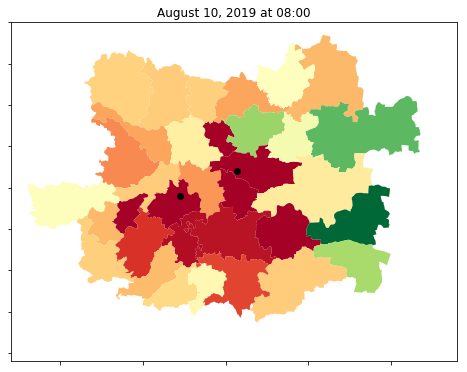

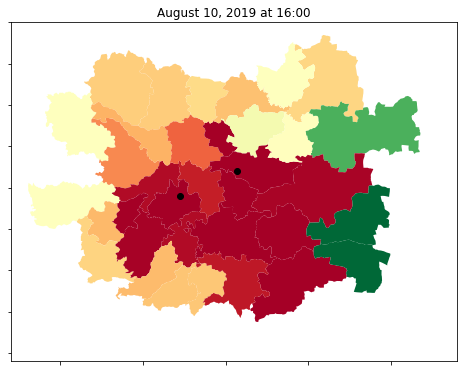

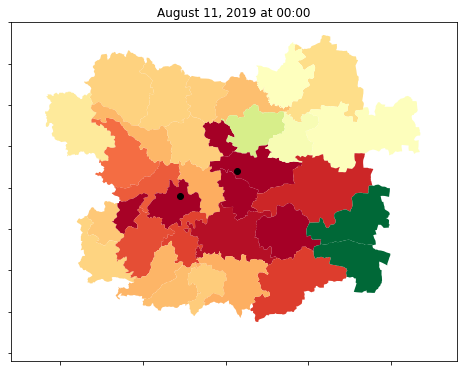

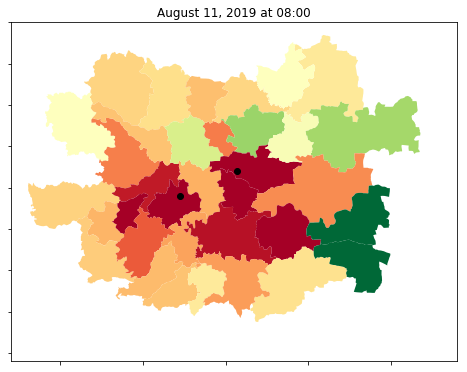

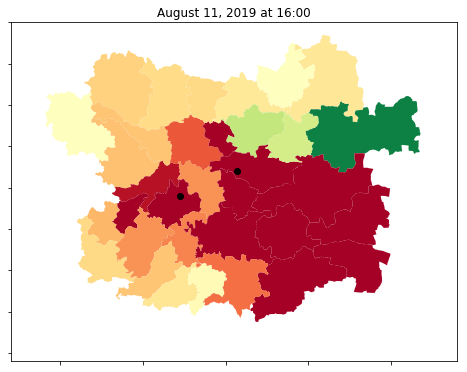

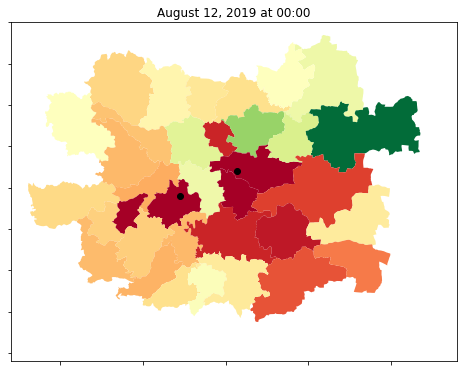

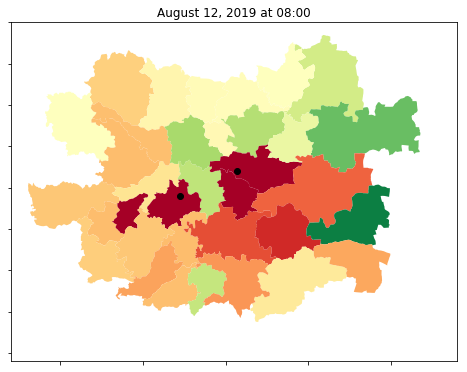

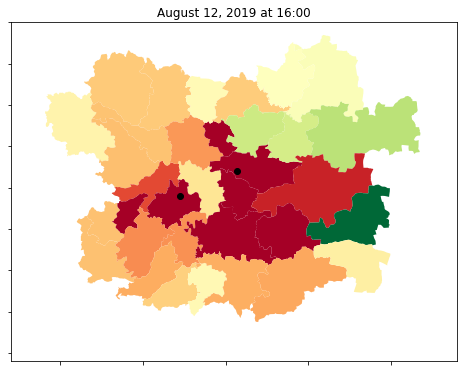

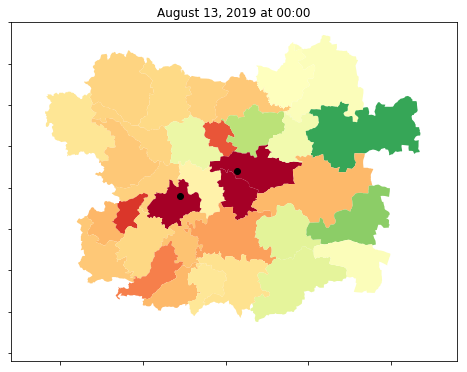

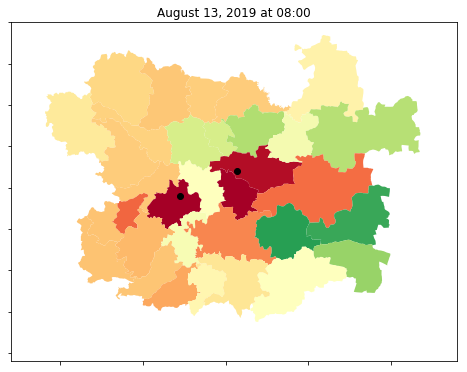

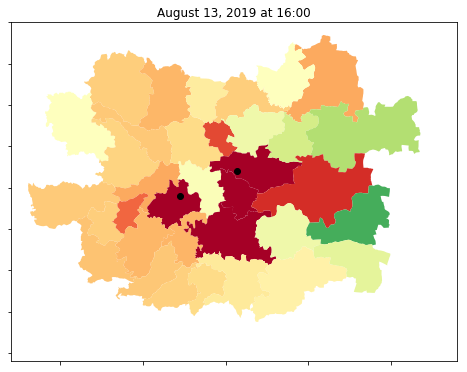

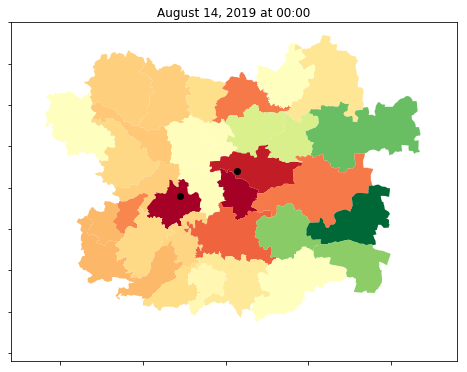

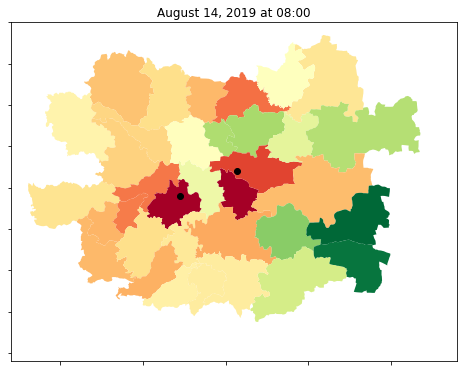

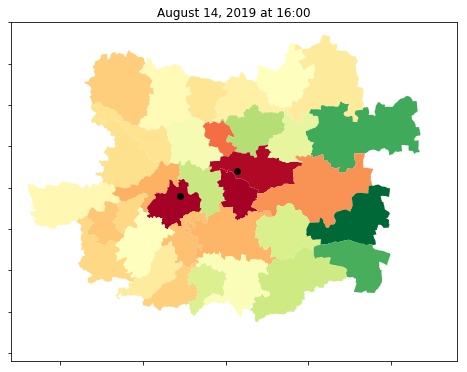

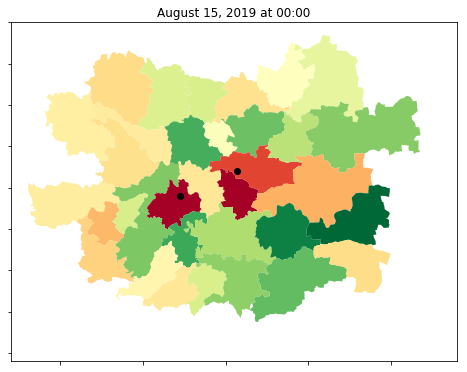

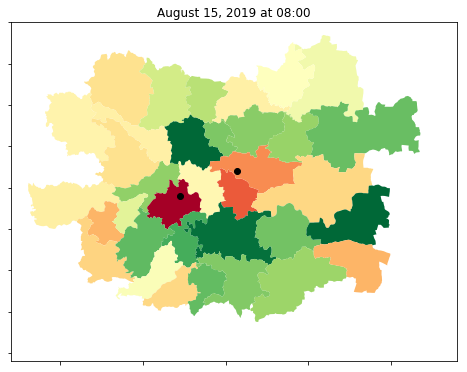

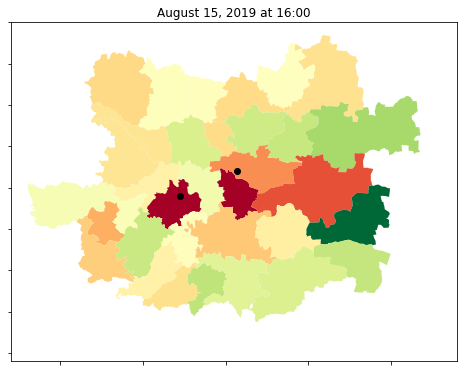

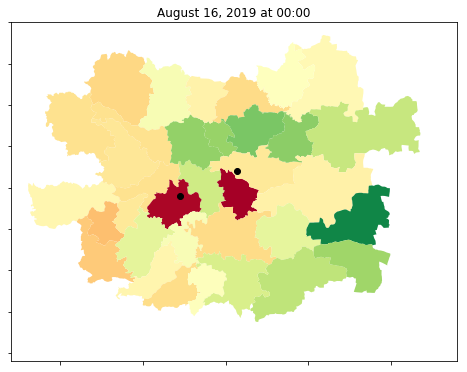

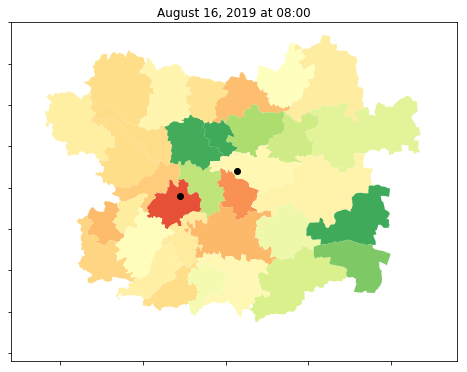

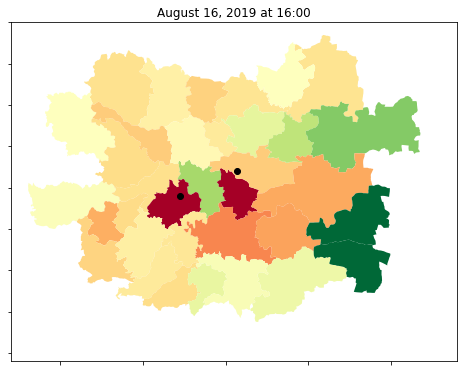

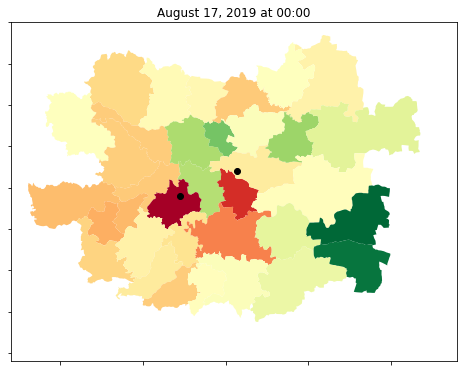

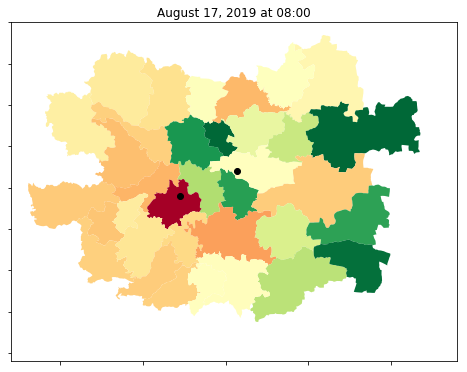

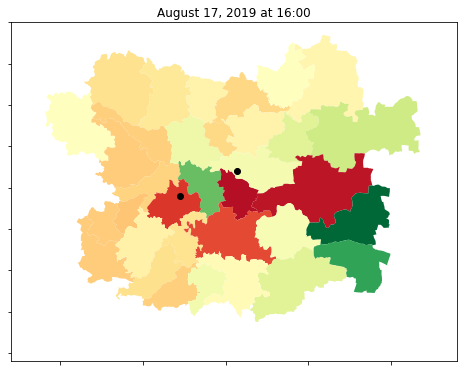

In [161]:
for file in admin_region_files:
    show_map(file)

### Load the population tile data

In [7]:
folder = 'the_flooding_across_southwest_maharashtra_india_facebook_population_tile_level'
tile_files = os.listdir(folder)

In [48]:
tile_files.sort()
tile_files = [file for file in tile_files if file[-3:] == 'tif']
tile_files[:3]


['20190806_0000.tif', '20190806_0800.tif', '20190806_1600.tif']

In [84]:
src = rasterio.open(folder + '/' + tile_files[10])
arr = src.read(5)
arr[arr<-5000] = np.nan

In [74]:
src.nodatavals
msk = src.read_masks(4)

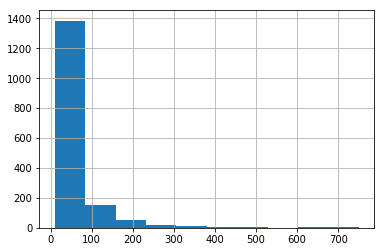

In [71]:
pd.Series(arr.ravel()).hist()    # band 1   - maybe baseline people?

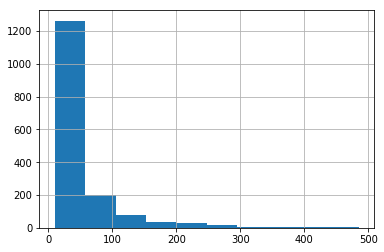

In [75]:
pd.Series(arr.ravel()).hist()    # band 2    - crisis people?

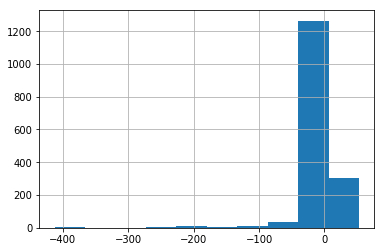

In [82]:
pd.Series(arr.ravel()).hist()    # band 3    - difference?

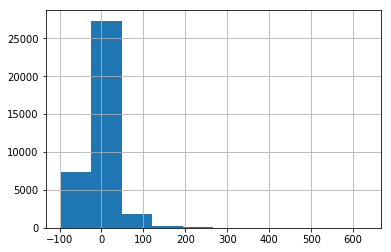

In [80]:
pd.Series(arr.ravel()).hist()    # band 4   - percentage change?

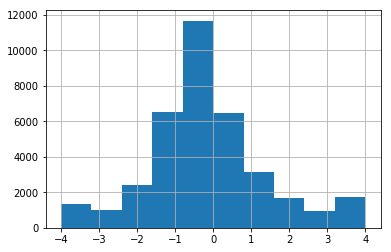

In [85]:
pd.Series(arr.ravel()).hist()    # band 5   - z-score

In [88]:
for tile in tile_files:
    print(tile)

20190806_0000.tif
20190806_0800.tif
20190806_1600.tif
20190807_0000.tif
20190807_0800.tif
20190807_1600.tif
20190808_0000.tif
20190808_0800.tif
20190808_1600.tif
20190809_0000.tif
20190809_0800.tif
20190809_1600.tif
20190810_0000.tif
20190810_0800.tif
20190810_1600.tif
20190811_0000.tif
20190811_0800.tif
20190811_1600.tif
20190812_0000.tif
20190812_0800.tif
20190812_1600.tif
20190813_0000.tif
20190813_0800.tif
20190813_1600.tif
20190814_0000.tif
20190814_0800.tif
20190814_1600.tif
20190815_0000.tif
20190815_0800.tif
20190815_1600.tif
20190816_0000.tif
20190816_0800.tif
20190816_1600.tif
20190817_0000.tif
20190817_0800.tif
20190817_1600.tif


In [100]:
! ls


Untitled.ipynb
admin_regions
pop_animation
the_flooding_across_southwest_maharashtra_india_difference_in_network_coverage_conservative
the_flooding_across_southwest_maharashtra_india_difference_in_network_coverage_normal
the_flooding_across_southwest_maharashtra_india_facebook_population_tile_level
the_flooding_across_southwest_maharashtra_india_facebook_traffic
the_flooding_across_southwest_maharashtra_india_movement_between_administrative_regions.csv
the_flooding_across_southwest_maharashtra_india_movement_between_tiles
the_flooding_across_southwest_maharashtra_india_network_coverage_conservative
the_flooding_across_southwest_maharashtra_india_network_coverage_normal
tile_animation


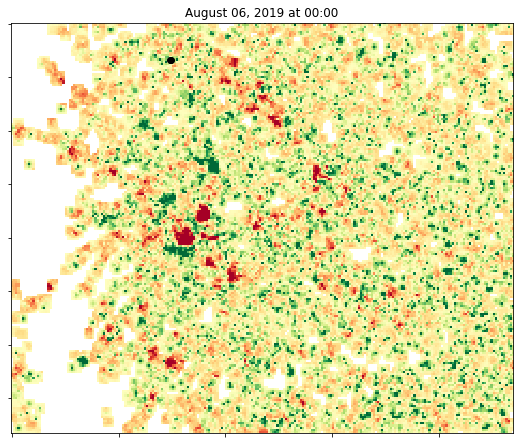

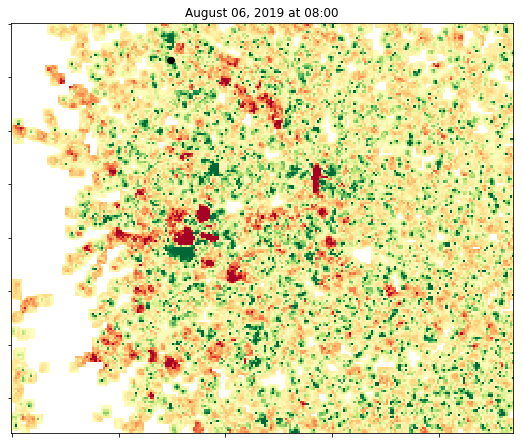

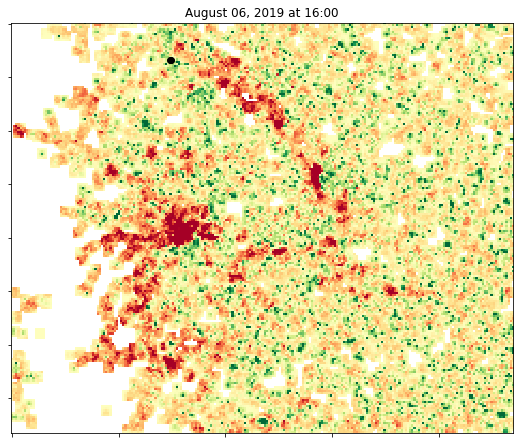

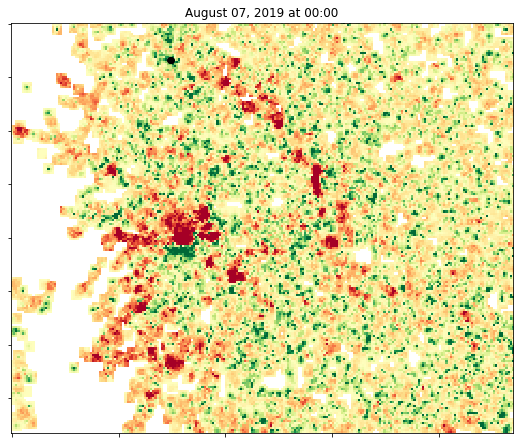

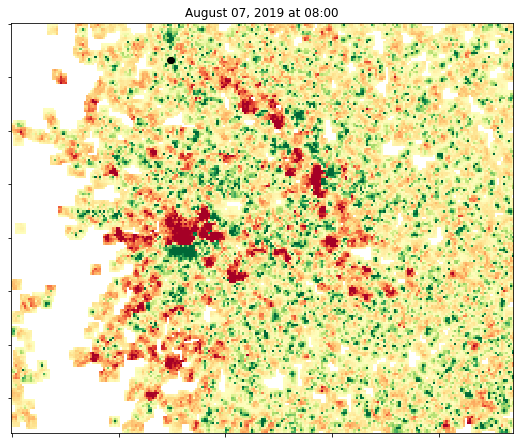

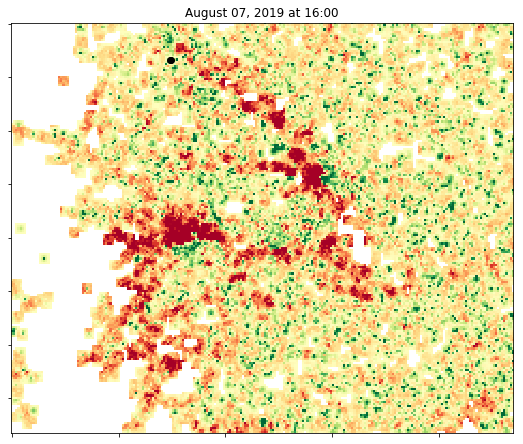

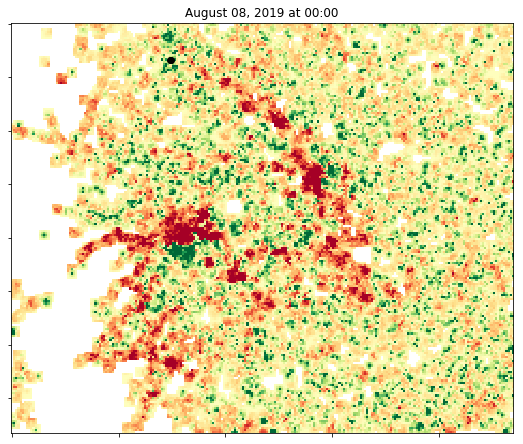

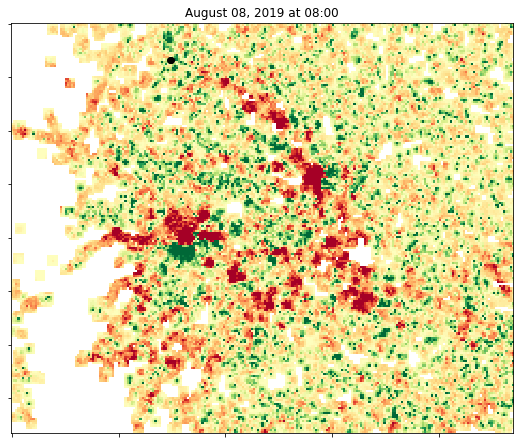

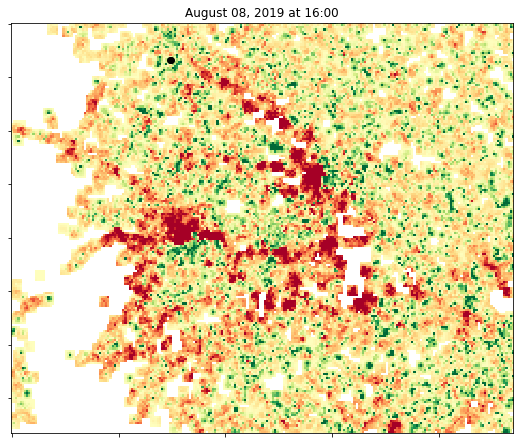

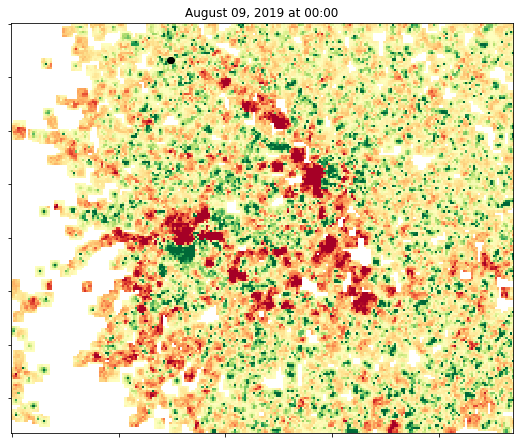

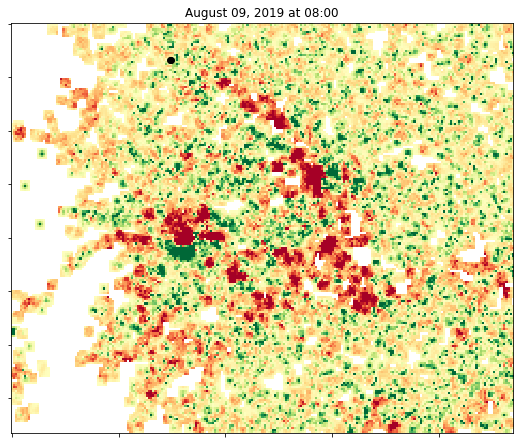

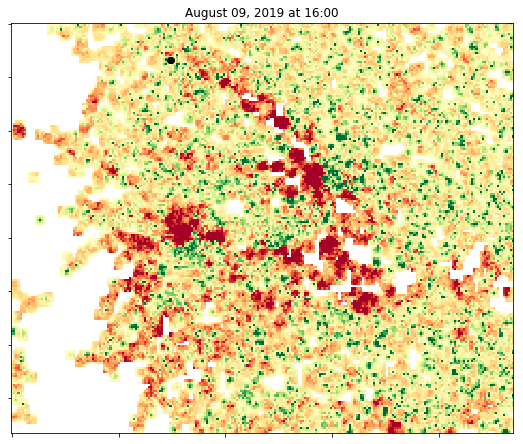

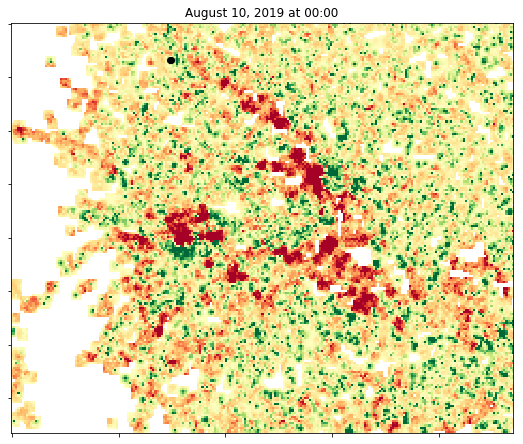

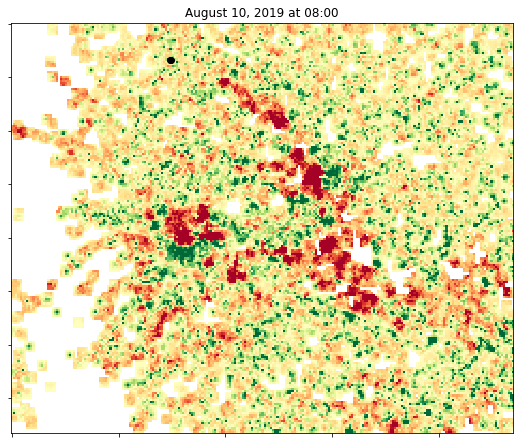

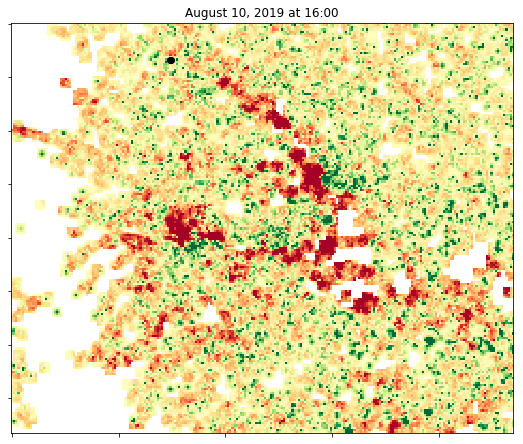

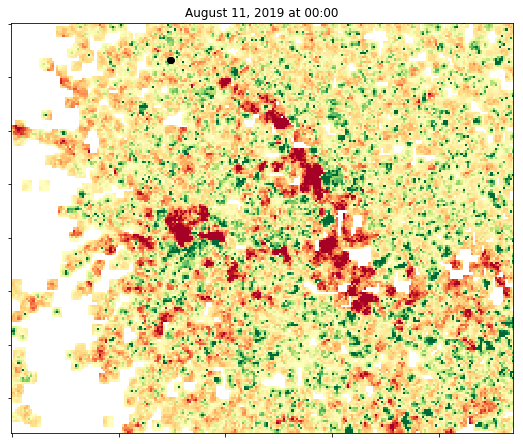

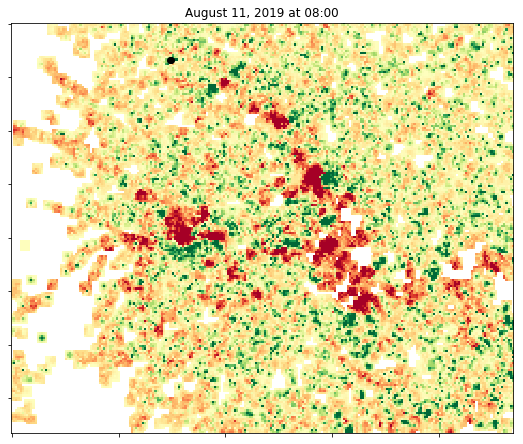

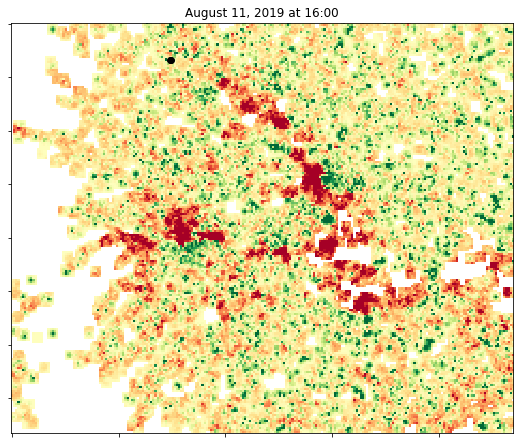

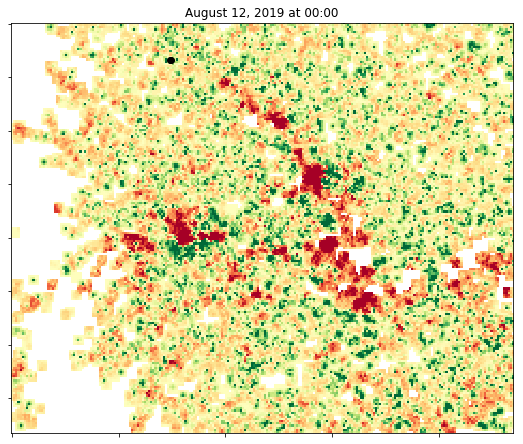

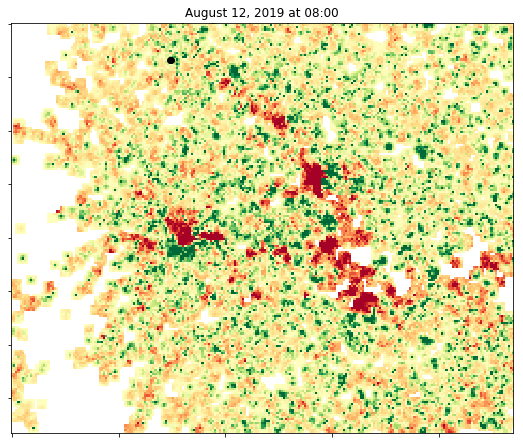

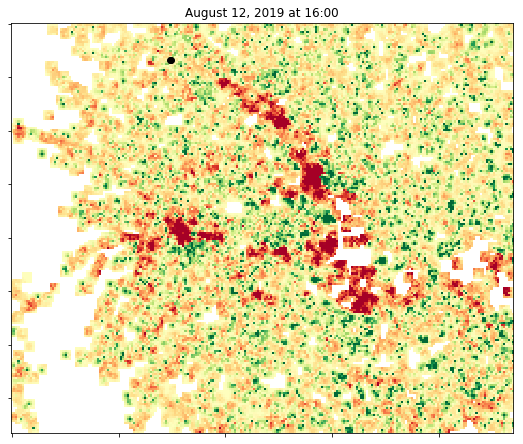

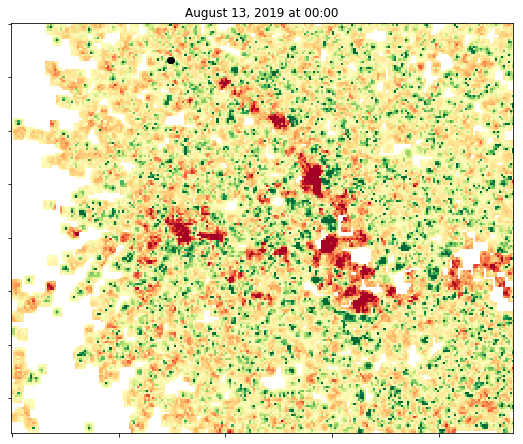

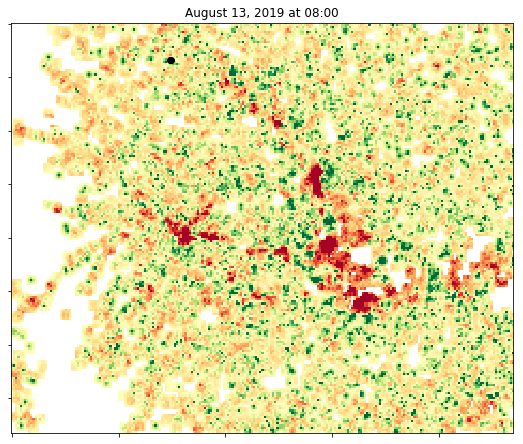

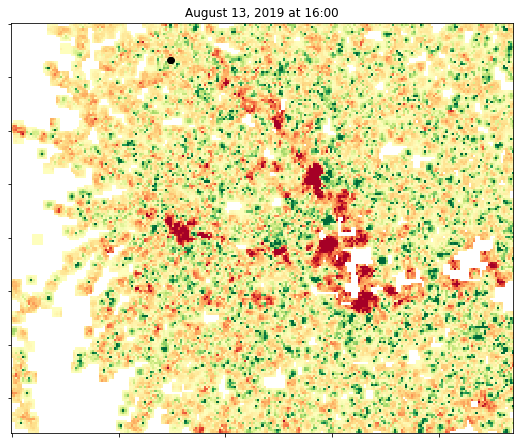

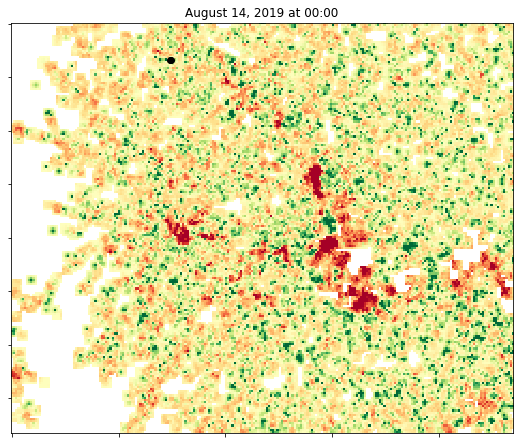

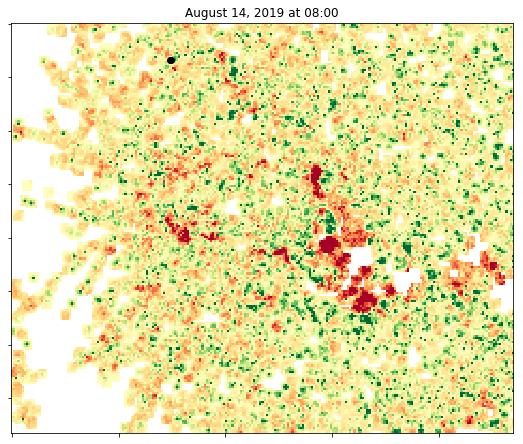

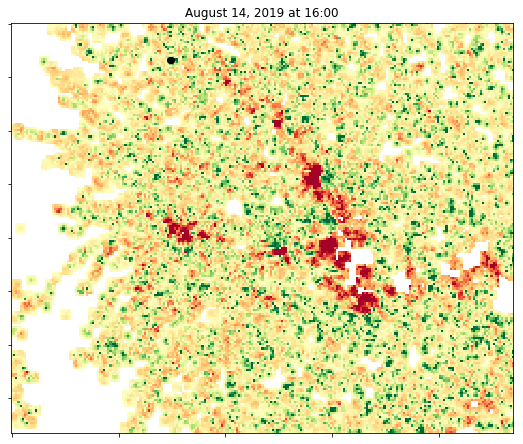

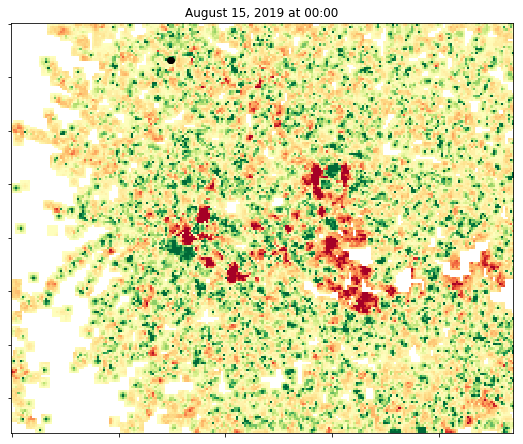

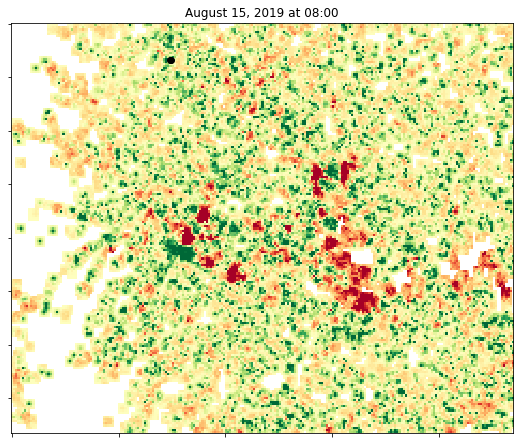

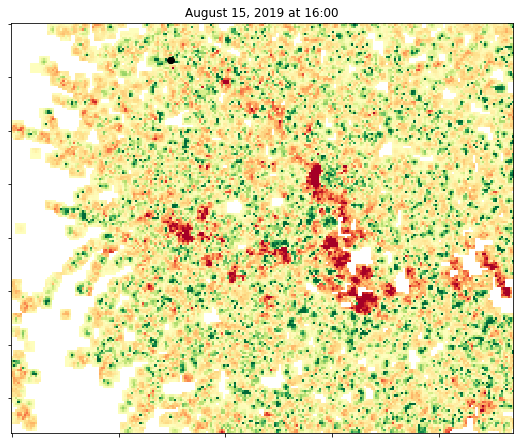

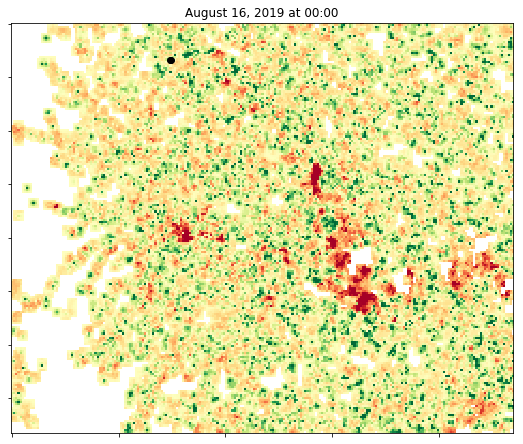

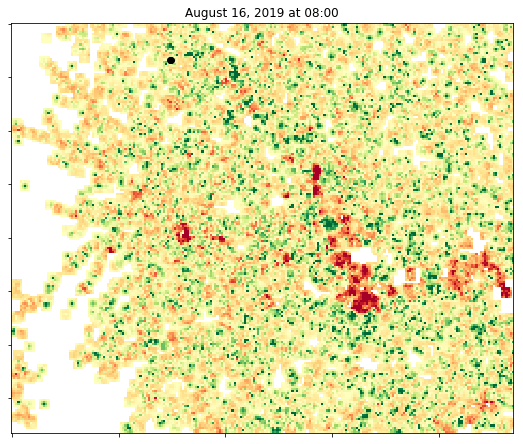

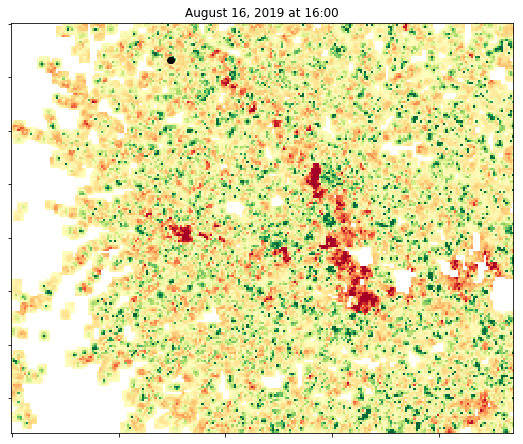

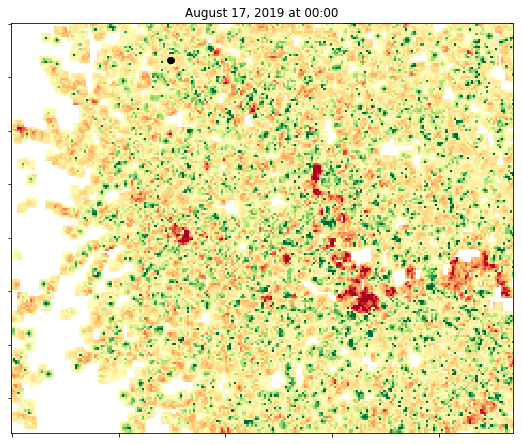

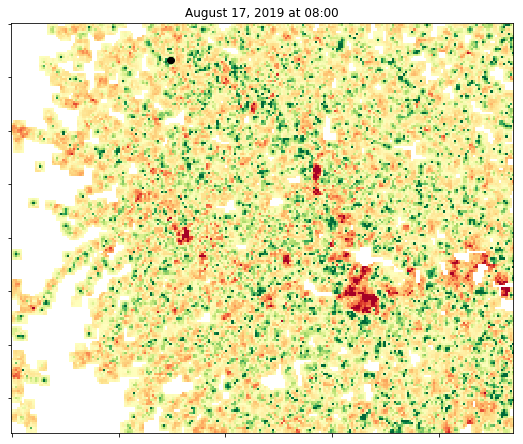

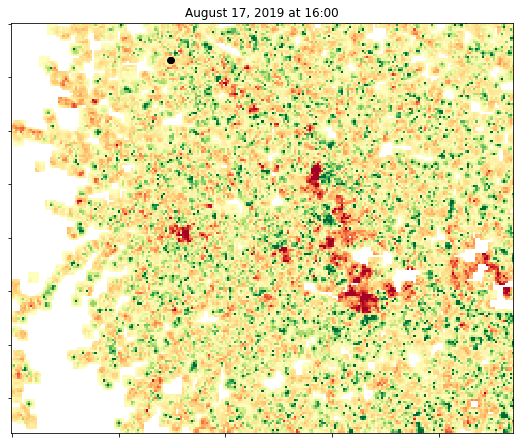

In [103]:
for tile in tile_files:
    src = rasterio.open(folder + '/' + tile)
    arr = src.read(5)
    arr[arr < - 1000] = np.nan
    f,ax = plt.subplots(figsize = [9,9])
    plt.imshow(arr, cmap = 'RdYlGn')
    plt.scatter(74.223182,16.698363, color = 'k')   # Kohlapur
    plt.scatter(74.569727,16.851446, color = 'k')    # Sangli
    ax.set(title = "August {}, 2019 at {}:{}".format(tile[6:8], tile[9:11], tile[11:13]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.savefig('tile_animation/'+tile[:-4])

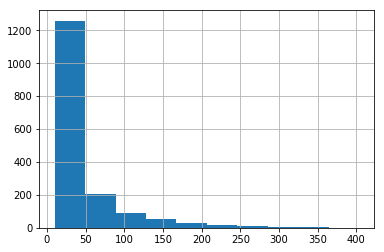

In [19]:
pd.Series(arr.ravel()).hist()

In [105]:
os.listdir('the_flooding_across_southwest_maharashtra_india_movement_between_tiles')[:3]

['20190809_0800.csv', '20190808_0800.csv', '20190806_0000.csv']

In [108]:
df2 = pd.read_csv('the_flooding_across_southwest_maharashtra_india_movement_between_tiles/20190809_0800.csv')
df2['Geometry'] = df2['Geometry'].apply(loads)
gdf = gpd.GeoDataFrame(df2, geometry = 'Geometry')

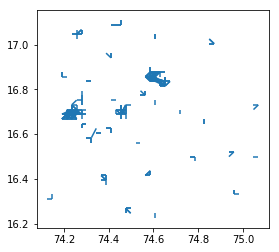

In [109]:
gdf.plot()

In [110]:
gdf.head()

Difference  Baseline: People Moving  Crisis: People Moving  Percent Change  \
0         6.6                     10.4                     17       57.894737   
1        -4.4                     50.4                     46       -8.560311   
2        -2.2                     14.2                     12      -14.473684   
3         0.8                     13.2                     14        5.633803   
4         2.6                     17.4                     20       14.130435   

   Standard (Z) Score Starting Region Name Ending Region Name  \
0            2.530984          Hatkanangle        Hatkanangle   
1           -0.636413          Hatkanangle        Hatkanangle   
2           -0.768273                Palus              Palus   
3            0.171736                Palus              Palus   
4            0.511875                Palus              Palus   

   Starting Location  Ending Location  Length(km)  \
0            1103094          1103094    2.340209   
1            1103094          1103094    2.340337   
2            1103106          1103106    2.335391   
3            1103106          1103106    2.335390   
4            1103106          1103106    2.335258   

                                            Geometry  
0  LINESTRING (74.43237305232763 16.6888166676634...  
1  LINESTRING (74.43237305232763 16.6888166676634...  
2  LINESTRING (74.43237305385979 17.0882909237123...  
3  LINESTRING (74.43237305385979 17.0882909237123...  
4  LINESTRING (74.45434569457369 17.1092923672686...